Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- **K-Means Clusterin**g

Definition: A partition-based clustering algorithm. It divides the dataset into k clusters by minimizing the distance between points and their cluster centroids.

How it works:

Choose the number of clusters (k).

Randomly initialize cluster centroids.

Assign each data point to the nearest centroid.

Update centroids based on cluster means.

Repeat until convergence.

Pros:

Fast and efficient for large datasets.

Works well with spherical, equally sized clusters.

Cons:

Need to predefine k.

Sensitive to initialization and outliers.
**Hierarchical Clustering**

Definition: A tree-based (hierarchical) clustering method. It creates clusters by either:

Agglomerative (bottom-up): Start with each point as its own cluster and merge them step by step.

Divisive (top-down): Start with one cluster and split recursively.

How it works: Produces a dendrogram (tree diagram) that shows nested clusters at different levels of similarity.

Pros:

No need to predefine the number of clusters.

Dendrogram helps in visualizing relationships.

Cons:

Computationally expensive for large datasets.

Sensitive to noise and scaling.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- Silhouette Score in Clustering
Definition

The Silhouette Score is a metric used to evaluate how well data points are clustered.
It measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The score ranges between -1 and +1:

+1 → Point is well-matched to its cluster and far from others.

0 → Point lies on the boundary between clusters.

-1 → Point might be assigned to the wrong cluster.
For each data point i:

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

where
a(i)=Average distance of point i to all other points in the same cluster (int)ra-cluster distance)
B(i)=Minimum average distance of point i to all points in the nearest different cluster (inter-cluster distance).
Purpose

Assess clustering quality → Tells whether clusters are well-separated and cohesive.

Choose the optimal number of clusters (k) → Compare silhouette scores across different k values; the higher, the better.

Detect misclassified points → Negative or low scores highlight poorly clustered samples.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
- Core Parameters of DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed and marks points in low-density regions as outliers.

It mainly relies on two core parameters:

DBSCAN depends on two key parameters: ε (epsilon) and MinPts (minimum points).

ε defines the neighborhood radius — smaller values create many small clusters and more noise, while larger values form fewer, bigger clusters.

MinPts sets the minimum density needed to form a cluster — low values make clusters easier to form, while high values make clustering stricter and increase noise.
Together, they determine which points become core points, border points, or outliers, directly shaping the number, size, and quality of clusters.

Would you like me to also prepare a one-line crisp version for exam-style answers?

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
- Clustering algorithms rely on distance calculations (e.g., Euclidean distance) to group points. If features are on different scales (e.g., income in lakhs vs. age in years), the larger-scaled feature dominates the distance measure, leading to biased clusters.

In K-Means, centroids are updated based on mean distances, so unscaled features distort cluster assignments.

In DBSCAN, ε-neighborhoods are determined by distances — without scaling, one feature may outweigh others and misclassify core/border/noise points.

Scaling (e.g., Standardization or Min-Max normalization) ensures all features contribute equally, improving cluster quality and interpretability.
Example: If clustering customers by age (20–70 years) and income (₹20,000–₹1,00,000), income will dominate unless scaled, and clusters may form mostly by income while ignoring age.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- Elbow Method in K-Means Clustering

The Elbow Method is a technique used to find the optimal number of clusters (k) in K-Means.

K-Means aims to minimize the Within-Cluster Sum of Squares (WCSS), i.e., the total variance within clusters.

As k increases, WCSS decreases because clusters become smaller and tighter.

However, after a certain point, the rate of improvement drops — forming an “elbow” shape in the plot of k vs. WCSS.

The elbow point indicates the best trade-off between fewer clusters (underfitting) and too many clusters (overfitting).

Example: In customer segmentation, plotting WCSS vs. k may show an elbow at k = 4, suggesting that 4 clusters give meaningful customer groups without overcomplicating the model.

The Elbow Method helps choose the right number of clusters by identifying where adding more clusters gives diminishing returns.

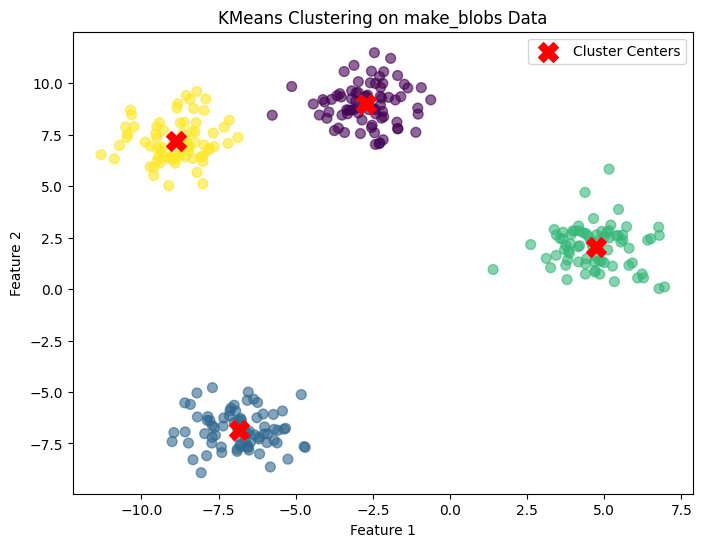

In [1]:
#Dataset:
#Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
#specified.
#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
#apply KMeans clustering, and visualize the results with cluster centers.
#(Include your Python code and output in the code box below.)

# Question 6: KMeans on make_blobs data

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize clusters with cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Cluster Centers')
plt.title("KMeans Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCANmodel. Print the number of clusters found (excluding noise).(Include your Python code and output in the code box below.)

# Question 7: DBSCAN on Wine dataset

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Apply StandardScaler (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)   # eps chosen empirically
labels = dbscan.fit_predict(X_scaled)

# 4. Count number of clusters (excluding noise = -1 label)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Cluster labels:", np.unique(labels))
print("Number of clusters found (excluding noise):", n_clusters)


Cluster labels: [-1]
Number of clusters found (excluding noise): 0


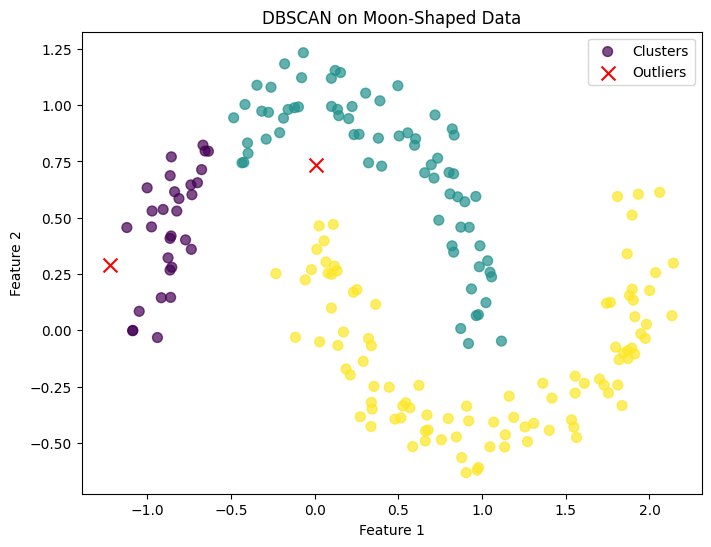

In [3]:
#Question 8: Generate moon-shaped synthetic data usingmake_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers inthe plot.(Include your Python code and output in the code box below.)

# Question 8: DBSCAN on moon-shaped data

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Plot clusters with outliers
plt.figure(figsize=(8,6))

# Plot clustered points
plt.scatter(X[labels >= 0, 0], X[labels >= 0, 1],
            c=labels[labels >= 0], cmap="viridis", s=50, alpha=0.7, label="Clusters")

# Highlight outliers (label = -1)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c="red", marker="x", s=100, label="Outliers")

plt.title("DBSCAN on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


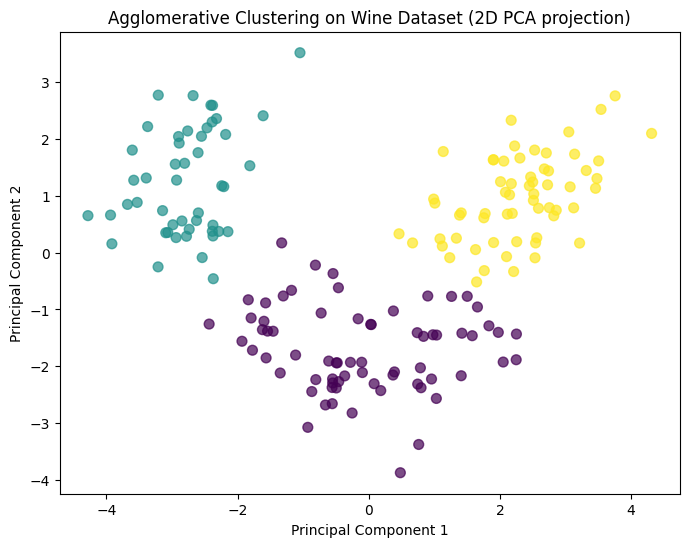

In [5]:
#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then applyAgglomerative Clustering and visualize the result in 2D with a scatter plot.(Include your Python code and output in the code box below.)

# Question 9: PCA + Agglomerative Clustering on Wine dataset

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clust.fit_predict(X_pca)

# 5. Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=50, alpha=0.7)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


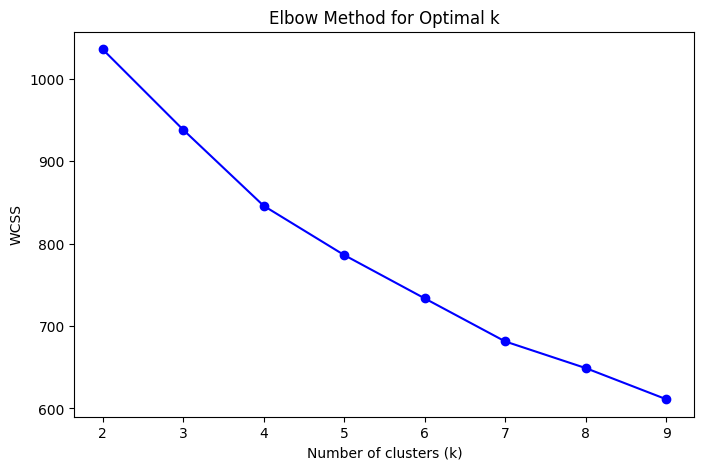

Silhouette Score: 0.12897693077806924
   Age  Annual_Income  Spending_Score  Electronics_Purchases  \
0   56          72733              36                      8   
1   46          85318              45                      6   
2   32         109474              20                     13   
3   60          43664              65                     19   
4   25          87172               8                     18   

   Fashion_Purchases  Grocery_Purchases  Cluster  
0                  4                  5        2  
1                 28                 48        3  
2                  3                 29        3  
3                  9                 37        0  
4                 23                  1        1  


In [6]:
#Question 10: You are working as a data analyst at an e-commerce company. The
#marketing team wants to segment customers based on their purchasing behavior to run
#targeted promotions. The dataset contains customer demographics and their product
#purchase history across categories.
#Describe your real-world data science workflow using clustering:
#● Which clustering algorithm(s) would you use and why?
#● How would you preprocess the data (missing values, scaling)?
#● How would you determine the number of clusters?
#● How would the marketing team benefit from your clustering analysis?
#(Include your Python code and output in the code box below.)

# Question 10: Customer Segmentation Workflow

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Simulate customer dataset (demographics + purchasing behavior)
np.random.seed(42)
data = {
    "Age": np.random.randint(18, 65, 200),
    "Annual_Income": np.random.randint(20000, 120000, 200),
    "Spending_Score": np.random.randint(1, 100, 200),   # purchase behavior
    "Electronics_Purchases": np.random.randint(0, 20, 200),
    "Fashion_Purchases": np.random.randint(0, 30, 200),
    "Grocery_Purchases": np.random.randint(0, 50, 200)
}
df = pd.DataFrame(data)

# 2. Preprocessing: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Find optimal number of clusters using Elbow method
wcss = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# 4. Apply KMeans with chosen k (say k=4 from elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 5. Evaluate with Silhouette Score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# 6. Add cluster labels to dataset
df["Cluster"] = labels
print(df.head())


Real-World Data Science Workflow for Customer Segmentation
1. Choice of Clustering Algorithm

K-Means → Good starting point for large datasets with spherical clusters.

DBSCAN → Useful if we expect irregular cluster shapes or want to detect outliers (e.g., unusual customers).

Hierarchical Clustering → Helps in exploring the data and visualizing customer group relationships

Data Preprocessing

Handle Missing Values:

Numerical → Impute with mean/median.

Categorical → Impute with mode or create an "Unknown" category.

Encoding: One-Hot Encoding for categorical variables (e.g., gender, region).

Scaling: Use StandardScaler or MinMaxScaler since clustering is distance-based.
Determining Number of Clusters

Elbow Method → Plot WCSS vs. k to identify the "elbow".

Silhouette Score → Measure cluster cohesion & separation.

Business validation → Ensure clusters make sense for marketing (e.g., high-value vs. discount shoppers).
4. Marketing Benefits

Personalized promotions (e.g., premium customers get loyalty rewards, budget customers get discount offers).

Product recommendation (clusters show category affinities).

Customer retention (identify churn-prone groups).

Better ROI from targeted campaigns instead of blanket promotions.